<img src="CY-Cergy-Paris-172_coul.png">

# Diplôme universitaire Data Analyst (DUDA)

**Ana Maria ARMENTA PEREA**

Mars 2023

## Préparation au Diplôme Universitaire

### 1. Exploration d’un jeu de données

In [ ]:
pip install gitpython

In [1]:
# Importing modules

import pandas as pd
import matplotlib.pyplot as plt
#import plotnine as p9
import seaborn as sns
import git

In [3]:
git.Repo.clone_from('https://github.com/anitarmenta/Projets.git',
                    'C:/Users/anita/Desktop/Data_Analyst/DataCamp/Git_Projects')

<git.repo.base.Repo 'C:\\Users\\anita\\Desktop\\Data_Analyst\\DataCamp\\Git_Projects\\.git'>

In [36]:
repo = git.Repo('C:/Users/anita/Desktop/Data_Analyst/DataCamp/Git_Projects')
# Hacer cambios a los archivos en el repositorio
repo.index.add(['../Preparation_au_Diplome_Universitaire/Proyecto_0/Test_Proyecto_0.ipynb'])
repo.index.commit("Mensaje de confirmación")
origin = repo.remote(name='origin')
origin.push()


In [5]:
# Création du DataFrame et exploration de celle-ci
# Read datasets/PhD.dataset.csv into dataPhD

dataPhD = pd.read_csv("datasets/PhD.dataset.csv", encoding='utf-8', 
    parse_dates=["Date de soutenance"])

print(dataPhD.head())

C:\Users\anita\AppData\Local\Temp\ipykernel_17292\2923908881.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.


   Unnamed: 0               Auteur Identifiant auteur  \
0           0       Saeed Al marri                NaN   
1           1    Andrea Ramazzotti          174423705   
2           2  OLIVIER BODENREIDER                NaN   
3           3       Emmanuel Porte                NaN   
4           4     Arthur Devriendt                NaN   

                                               Titre  \
0  Le credit documentaire et l'onopposabilite des...   
1  Application de la PGD a la resolution de probl...   
2  Conception d'un outil informatique d'etude des...   
3  Socio-histoire des politiques publiques en mat...   
4  LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   

                           Directeur de these  \
0                         Philippe Delebecque   
1  Jean-Claude Grandidier,Marianne Beringhier   
2                             Francois Kohler   
3                               Gilles Pollet   
4                               Gabriel Dupuy   

              Directeur d

In [6]:
# Voir le nom de chacune des colonnes, le type de données et s'il manque des données
print(dataPhD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Unnamed: 0                                448047 non-null  int64         
 1   Auteur                                    448047 non-null  object        
 2   Identifiant auteur                        317700 non-null  object        
 3   Titre                                     448040 non-null  object        
 4   Directeur de these                        448034 non-null  object        
 5   Directeur de these (nom prenom)           448034 non-null  object        
 6   Identifiant directeur                     448047 non-null  object        
 7   Etablissement de soutenance               448046 non-null  object        
 8   Identifiant etablissement                 430965 non-null  object        
 9   Discipline     

In [7]:
# Trouver les valeurs uniques de la colonne Langue

dataPhD['Langue de la these'].unique()

array(['na', 'fr', 'en', 'ro', 'es', 'de', 'FR', 'zh', 'bs', 'it', 'co',
       'fren', 'enfr', 'enzh', 'pt', 'frensl', 'fres', 'zhen', 'esen',
       'itfr', 'frel', 'cs', 'frpten', 'hu', 'enfrde', 'esenfr', 'frpl',
       'elfr', 'frhu', 'frar', 'itfren', 'frit', 'frzh', 'enfrzh', 'frvi',
       'frenes', 'ru', 'defr', 'pl', 'bg', 'frkm', 'kkenfr', 'frcs',
       'ptfren', 'el', 'enfreu', 'pten', 'frpt', 'esfr', 'ptfr', 'rufr',
       'br', 'cafr', 'sr', 'enru', 'ensl', 'frde', 'frja', 'frla', 'ar',
       'ca', 'fraf', 'eu', 'enesfr', 'freu', 'rofr', 'frgrc', 'enpt',
       'encsfr', 'he', 'enptfr', 'enit', 'fresen', 'enpl', 'sv', 'eufr',
       'enfrpt', 'frbr', 'ukfren', 'frruen', 'arfr', 'hyfrru', 'csfrsk',
       'frhe', 'frru', 'brfr', 'akfr', 'zhfr', 'frms', 'enfrpl', 'frmn',
       'enfrit', 'envi', 'frro', 'frfy', 'frsl', 'enfres', 'frqu', 'as',
       'frln', 'frenpt', 'abfr', 'uk', 'roen', 'plen', 'frenzh',
       'frendees', 'enfrcs', 'itzh', 'cofr', 'frtch', 'eufres', 'j

In [8]:
dataPhD['Langue de la these'].value_counts()

fr          334443
na           64120
en           30948
enfr         10579
fren          4793
             ...  
frtch            1
cofr             1
itzh             1
frendees         1
nlenfr           1
Name: Langue de la these, Length: 206, dtype: int64

In [9]:
# How to Recode a Categorical Variable in a Python Dataframe
# https://www.sharpsightlabs.com/blog/recode-categorical-variable-python/
# https://www.youtube.com/watch?v=yWu5wbaMY3c


### 1.1 Choix de la langue d’écriture

**Objectifs : recodage de variables et conception des premiers graphiques**

<p> Une variable est dédiée à la langue d’écriture. Vous recoderez (en anglais : <em>to recode</em>) l’ensemble des différents niveaux en quatre niveaux (Français, Anglais, Bilingue, uniquement pour Anglais-Français ou Français-Anglais, soit enfr et fren, et Autre). Appelez cette nouvelle variable <em>language.rec</em>. Traitez la date de la soutenance comme une date, et montrez à travers un plot matplotlib ou ggplot2 (ou pourquoi pas, seaborn), comment le choix de la langue d’écriture a évolué au cours des deux dernières décennies.</p>

In [10]:
# Créer des listes avec les quatre niveaux

fra = ['fr', 'FR']
ang = 'en'
bil = ['enfr', 'fren']
autres = ['na', 'ro', 'es', 'de', 'zh', 'bs', 'it', 'co',
       'enzh', 'pt', 'frensl', 'fres', 'zhen', 'esen',
       'itfr', 'frel', 'cs', 'frpten', 'hu', 'enfrde', 'esenfr', 'frpl',
       'elfr', 'frhu', 'frar', 'itfren', 'frit', 'frzh', 'enfrzh', 'frvi',
       'frenes', 'ru', 'defr', 'pl', 'bg', 'frkm', 'kkenfr', 'frcs',
       'ptfren', 'el', 'enfreu', 'pten', 'frpt', 'esfr', 'ptfr', 'rufr',
       'br', 'cafr', 'sr', 'enru', 'ensl', 'frde', 'frja', 'frla', 'ar',
       'ca', 'fraf', 'eu', 'enesfr', 'freu', 'rofr', 'frgrc', 'enpt',
       'encsfr', 'he', 'enptfr', 'enit', 'fresen', 'enpl', 'sv', 'eufr',
       'enfrpt', 'frbr', 'ukfren', 'frruen', 'arfr', 'hyfrru', 'csfrsk',
       'frhe', 'frru', 'brfr', 'akfr', 'zhfr', 'frms', 'enfrpl', 'frmn',
       'enfrit', 'envi', 'frro', 'frfy', 'frsl', 'enfres', 'frqu', 'as',
       'frln', 'frenpt', 'abfr', 'uk', 'roen', 'plen', 'frenzh',
       'frendees', 'enfrcs', 'itzh', 'cofr', 'frtch', 'eufres', 'ja',
       'enbo', 'frsa', 'itfrhe', 'froc', 'frkmsa', 'hyfr', 'zhfrit', 'nl',
       'nlen', 'csfr', 'enesfrca', 'enar', 'amfr', 'frtr', 'frsakm',
       'enarfr', 'itlafr', 'frff', 'itfrla', 'sq', 'entr', 'deenfr',
       'itla', 'enro', 'plfr', 'endefr', 'ptenfr', 'enes', 'frka', 'fafr',
       'akes', 'frmg', 'elenfr', 'csenfr', 'sqfr', 'zhenfr', 'ee',
       'bgenfr', 'frfr', 'enfrsk', 'encs', 'enfrro', 'fris', 'bgfr',
       'frgl', 'frko', 'enhu', 'deenfrit', 'azfr', 'fritla', 'enth',
       'frth', 'arenfrit', 'frfa', 'frty', 'eo', 'frid', 'frsv', 'aefr',
       'csfrla', 'enfrhu', 'zhfrug', 'myfr', 'enfrja', 'deen', 'amarfr',
       'aafr', 'frsi', 'enla', 'frlaptes', 'ares', 'arenfr', 'frnv',
       'enitfr', 'frplen', 'ad', 'frund', 'enfrvi', 'ab', 'frhi',
       'fritlaoc', 'am', 'enfrru', 'frukr', 'hy', 'enzhfr', 'enfrar',
       'et', 'id', 'cafres', 'frruuk', 'fi', 'nlenfr']

f = 'Français'
a = 'Anglais'
b = 'Bilingue'
au = 'Autre'


In [11]:
# REvisar
dataPhD['Langue de la these'].replace(fra,f, inplace = True)
dataPhD['Langue de la these'].replace(ang, a, inplace = True)
dataPhD['Langue de la these'].replace(bil, b, inplace = True)
dataPhD['Langue de la these'].replace(autres,au, inplace = True)

In [12]:
print(dataPhD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Unnamed: 0                                448047 non-null  int64         
 1   Auteur                                    448047 non-null  object        
 2   Identifiant auteur                        317700 non-null  object        
 3   Titre                                     448040 non-null  object        
 4   Directeur de these                        448034 non-null  object        
 5   Directeur de these (nom prenom)           448034 non-null  object        
 6   Identifiant directeur                     448047 non-null  object        
 7   Etablissement de soutenance               448046 non-null  object        
 8   Identifiant etablissement                 430965 non-null  object        
 9   Discipline     

In [13]:
dataPhD['Langue de la these'].value_counts()

Français    334445
Autre        67282
Anglais      30948
Bilingue     15372
Name: Langue de la these, dtype: int64

In [14]:
dataPhD['Year'].head()

0       NaN
1       NaN
2    1993.0
3       NaN
4       NaN
Name: Year, dtype: float64

In [15]:
dataPhD.rename(columns = {'Langue de la these':'Language_rec'}, inplace = True)

In [16]:
print(dataPhD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Unnamed: 0                                448047 non-null  int64         
 1   Auteur                                    448047 non-null  object        
 2   Identifiant auteur                        317700 non-null  object        
 3   Titre                                     448040 non-null  object        
 4   Directeur de these                        448034 non-null  object        
 5   Directeur de these (nom prenom)           448034 non-null  object        
 6   Identifiant directeur                     448047 non-null  object        
 7   Etablissement de soutenance               448046 non-null  object        
 8   Identifiant etablissement                 430965 non-null  object        
 9   Discipline     

In [17]:
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
dataPhD_fr = dataPhD[dataPhD['Language_rec'] == 'Français']
dataPhD_au = dataPhD[dataPhD['Language_rec'] == 'Autre']
dataPhD_an = dataPhD[dataPhD['Language_rec'] == 'Anglais']
dataPhD_bi = dataPhD[dataPhD['Language_rec'] == 'Bilingue']

<AxesSubplot:xlabel='Language_rec', ylabel='count'>

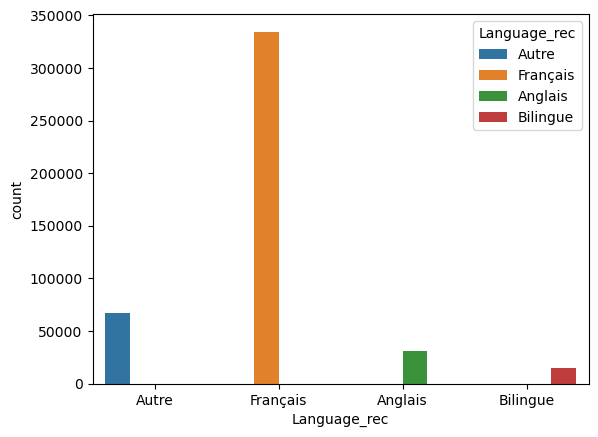

In [18]:
# This makes plots appear in the notebook
%matplotlib inline

# 
sns.countplot(x = 'Language_rec', data = dataPhD, hue = 'Language_rec')



In [19]:
test =dataPhD.groupby(['Year', 'Language_rec']).size().reset_index(name='cantidad')

In [20]:
type(test)

pandas.core.frame.DataFrame

In [21]:
print(test.head(-5))

       Year Language_rec  cantidad
0    1971.0     Français         1
1    1972.0     Français         1
2    1973.0     Français         1
3    1976.0     Français         1
4    1979.0     Français         1
..      ...          ...       ...
142  2018.0     Bilingue       741
143  2018.0     Français      7807
144  2019.0      Anglais      2818
145  2019.0        Autre      1755
146  2019.0     Bilingue       530

[147 rows x 3 columns]


In [22]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          152 non-null    float64
 1   Language_rec  152 non-null    object 
 2   cantidad      152 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB
None


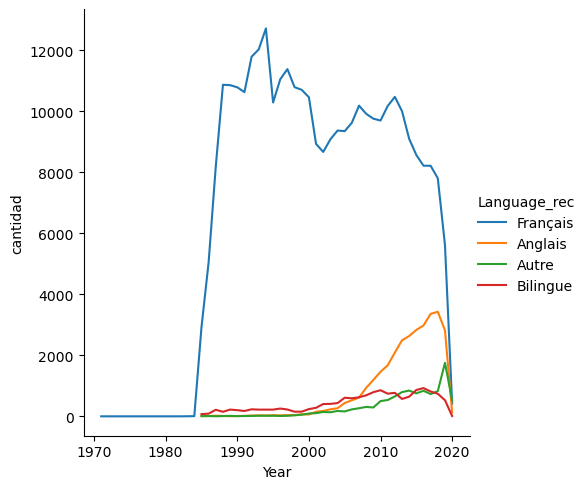

In [23]:
sns.relplot(x='Year', y = 'cantidad', data = test, kind = 'line', hue = 'Language_rec')

<AxesSubplot:xlabel='Year'>

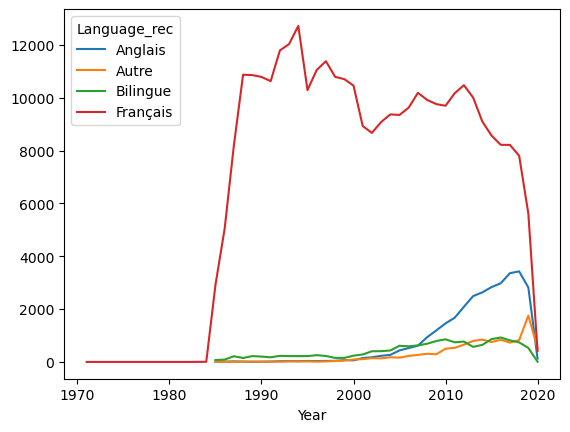

In [24]:
dataPhD.groupby(['Year', 'Language_rec']).size().unstack().plot.line()

In [25]:
#df.groupby(['Language_rec', 'Year']) agrupa el DataFrame por las columnas Language_rec y Year, creando un objeto GroupBy.
#.size() calcula el tamaño de cada grupo, es decir, el número de filas que tienen el mismo idioma y año.
#.unstack() convierte el índice jerárquico del resultado anterior en un índice simple y crea una nueva columna para
#cada nivel del índice. En este caso, crea una columna para cada idioma.
#.plot.line() hace un gráfico de línea con las columnas del resultado anterior como series de datos1 . En este caso,
#hace una serie de datos para cada idioma.

### 1.2 Une anomalie
**Objectifs : filtres - comptage**

<p> Pour une partie significative des candidats au doctorat, la date de soutenance et de début de thèse sont les mêmes. Comptez le nombre d’individus dans cette situation, en utilisant la notion de filtre (pas de boucle for acceptée). Utilisez un count.</p>

In [26]:
print(dataPhD['Date de soutenance'].head())

0          NaT
1          NaT
2   1993-01-01
3          NaT
4          NaT
Name: Date de soutenance, dtype: datetime64[ns]


In [27]:
print(dataPhD['Date de premiere inscription en doctorat'].head())

0    30-09-11
1    01-10-12
2         NaN
3    01-06-11
4    07-12-09
Name: Date de premiere inscription en doctorat, dtype: object


In [28]:
candidats_doctorat = dataPhD['Date de soutenance'] == dataPhD['Date de premiere inscription en doctorat']
print("Les doctorants dont les dates de soutenance et de début sont les mêmes : ",
      candidats_doctorat[candidats_doctorat==True].count().sum())

Les doctorants dont les dates de soutenance et de début sont les mêmes :  11


### 1.3 Identifiez les ”hyperdocteurs”

**Objectifs : group by, count**

<p>Identifiez les personnes qui ont soutenu plus d’un doctorat. Est-ce un phénomène commun ? Identifiez les noms des dix personnes les plus prolifiques parmi les hyperdocteurs (en termes de nombres de doctorats soutenus).</p>


In [29]:
hyperdocteurs = pd.DataFrame()
hyperdocteurs = dataPhD.groupby(['Auteur', 'Date de soutenance'])['Date de soutenance'].count()
hyperdocteurs[hyperdocteurs>1]
#hyperdocteurs.sort_values(ascending = False)
print(hyperdocteurs.sort_values(ascending = False).head(10))
#print(hyperdocteurs)

Auteur                                                           Date de soutenance
Fanny Le Morellec                                                2014-12-17            8
Rodrigo Andrade Botelho de Almeida (Andrade Botelho de Almeida)  2009-06-11            8
Gaiyun Liu                                                       2014-12-27            8
Guillaume Tergny                                                 2011-05-31            8
Amina Bouderba                                                   2012-06-30            8
Luigi Nardi                                                      2011-08-03            8
Yohann Nyirumulinga                                              2011-04-26            8
Jamel Azibi                                                      2014-09-23            8
Amandine Savall                                                  2014-10-12            8
Suzie Telep                                                      2019-11-10            4
Name: Date de soutenance, 

### 1.4 Quelles sont les principales universités pourvoyeuses de doctorats en France?

**Objectifs : Join, group-by**

<p>Comptez le nombre de thèses par établissement et par an (deux variables à mettre dans le groupby) et produisez une table que vous exporterez au format csv (nommée univyear.csv). Nous vous fournissons un nouveau jeu de données nomm´e ”opendata”. Vous utiliserez les colonnes identiques pour réaliser un ”join” (utilisez le nom de l’´etablissement). Réalisez un scatterplot pour représenter le lien entre le nombre de thèse soutenues en 2020 et une variable quantitative pertinente de opendata (comme le nombre d’étudiants inscrits dans une année donnée).</p>

In [30]:
universites = dataPhD.groupby(['Etablissement de soutenance', 'Date de soutenance']).count()
print(universites)

                                                Unnamed: 0  Auteur  \
Etablissement de soutenance Date de soutenance                       
AgroParisTech               2007-01-01                   1       1   
                            2008-01-01                   1       1   
                            2009-01-01                  12      12   
                            2010-01-01                  47      47   
                            2011-01-01                   4       4   
...                                                    ...     ...   
universite Paris-Saclay     2020-12-05                   1       1   
                            2020-12-06                   1       1   
valenciennes                1987-01-01                   1       1   
                            1992-01-01                   1       1   
                            1995-01-01                   1       1   

                                                Identifiant auteur  Titre  \
Etablissemen

In [ ]:
repo = git.Repo('C:/Users/anita/Desktop/Data_Analyst/DataCamp/Git_Projects')
# Hacer cambios a los archivos en el repositorio
repo.index.add(['../Preparation_au_Diplome_Universitaire/Proyecto_0/Projet_0.Ana_ARMENTA.ipynb'])
repo.index.commit("Mensaje de confirmación")
origin = repo.remote(name='origin')
origin.push()


Crea un archivo de Python en la carpeta raíz de tu proyecto y nómbralo push_to_github.py.
Copia y pega el código necesario para agregar, confirmar y enviar cambios a GitHub en este archivo. Aquí está el código de ejemplo que puedes utilizar como punto de partida:

In [ ]:
import git

# Inicializa el repositorio de Git
repo = git.Repo('C:/Users/anita/Desktop/Data_Analyst/DataCamp/Git_Projects')

# Añade los archivos que deseas enviar a GitHub
repo.index.add(['../Preparation_au_Diplome_Universitaire/Proyecto_0/Projet_0.Ana_ARMENTA.ipynb'])#, 'archivo2.py'])

# Confirma los cambios con un mensaje de confirmación
repo.index.commit("Mensaje de confirmación")

# Obtiene la referencia remota de tu repositorio en GitHub
origin = repo.remote(name='origin')

# Envía los cambios al repositorio remoto
origin.push()


Reemplaza /ruta/a/tu/proyecto con la ruta real de la carpeta donde se encuentra tu proyecto en tu computadora. También asegúrate de reemplazar archivo1.py y archivo2.py con los nombres de los archivos que deseas agregar al repositorio.
Ahora puedes ejecutar este script cada vez que desees enviar cambios a GitHub. Para hacer esto, abre una terminal en la carpeta raíz de tu proyecto y ejecuta el siguiente comando:

In [ ]:
python push_to_github.py

Esto ejecutará el script push_to_github.py y enviará los cambios a tu repositorio de GitHub.

Ten en cuenta que, para ejecutar este script, debes tener la biblioteca GitPython instalada en tu ambiente. Si aún no la tienes instalada, puedes instalarla utilizando el comando pip install GitPython.

No necesariamente. Si tus archivos están guardados en diferentes carpetas en tu computadora, aún puedes enviarlos a un repositorio de GitHub utilizando el mismo script de Python. Solo necesitas asegurarte de proporcionar la ruta correcta a cada archivo que deseas agregar al repositorio.

Por ejemplo, supongamos que tienes dos archivos que deseas enviar a un repositorio de GitHub: archivo1.py y archivo2.py. archivo1.py está guardado en la carpeta /ruta/a/tu/proyecto/carpeta1, y archivo2.py está guardado en la carpeta /ruta/a/tu/proyecto/carpeta2. Puedes utilizar el siguiente código para agregar ambos archivos al repositorio de GitHub:

In [ ]:
import git

# Inicializa el repositorio de Git
repo = git.Repo('C:/Users/anita/Desktop/Data_Analyst/DataCamp/Git_Projects')
#C:/Users/users/Desktop/file1/File2/Git'
#../../MyFiles/archivo1.py

# Añade el primer archivo al repositorio
carpeta1 = "../Preparation_au_Diplome_Universitaire/Proyecto_0"
ruta_archivo1 = carpeta1 + "/Projet_0.Ana_ARMENTA.ipynb"
repo.index.add([ruta_archivo1])

# Añade el segundo archivo al repositorio
#carpeta2 = '/ruta/a/tu/proyecto/carpeta2'
#ruta_archivo2 = carpeta2 + '/archivo2.py'
#repo.index.add([ruta_archivo2])
# Confirma los cambios con un mensaje de confirmación
repo.index.commit("Mensaje de confirmación")

# Obtiene la referencia remota de tu repositorio en GitHub
origin = repo.remote(name='origin')

# Envía los cambios al repositorio remoto
origin.push()


Aquí, carpeta1 y carpeta2 son las rutas a las carpetas donde están guardados los archivos. ruta_archivo1 y ruta_archivo2 son las rutas completas a los archivos que deseas agregar al repositorio. Al agregar los archivos utilizando estas rutas completas, puedes agregar archivos que se encuentran en diferentes carpetas de tu proyecto al mismo repositorio de GitHub.